# Кластеризация

Цель: найти группы (кластеры) схожих объектов в выборке. \
Это обучение без учителя.\
Заранее эти группы неизвестны - нет "правильных" ответов.\
Из-за этого есть сложности с оценкой качества. Нет строго способа оценки "качества" кластеризации.
Разные методы и даже разные "настройки" одного и того же метода порождают разные результаты кластеризации.

Основные методы кластерного анализа:
- К-средних
- Иерархический

## Метод К-средних
Итеративный (пошаговый) метод, который работает непосредственно с объетками.\
Необходимо заранее указать кол-во групп.\
Последовательность:
1. Дан набор объектов
2. Выбрать кол-во кластеров и случаным образом пометить соответсвующее кол-во точек - это будут центры кластеров (центроиды)
3. Для каждоый точки найти расстояние до центроида. Отнести точку к тому кластеру, к которому относится ближайший центроид.
4. После того, как все точки распределены рассчитать для каждого кластера найти новый центроид.
5. Повторить шаги 1-4 до момента стабилизации центроидов.


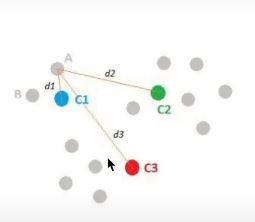

Алгоритм может давать плохие результаты, если:
- Число кластеров выбрано неверно
- Кластеры не выпуклые и близко расположены
- Дисперсии кластеров сильно отличаются
- Большая разница в размерах кластеров

Особенности работы:
- Алгоритм сходится к локальному оптимуму: результат не обязательно наилучший
- Инициализация центров крайне важна для качества решения (по умолчанию использовать k-means++)
- Крайне чувствителен к масштабу прогнозов

### Выбор количества кластеров
#### Метод локтя
Наиболее простой и распространенный способ. \
Оценивается степень разброса внутри каждого кластера.
Выбираем ту точку (локоть), где увеличение кол-ва классов не приводит к особому улучшению метрики. \
В sklearn - inertia.

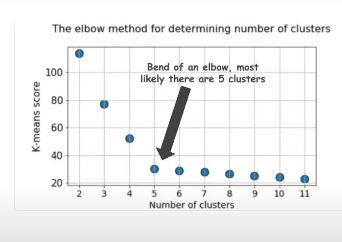

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style()

import numpy as np

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
X, y = make_blobs(n_samples=1000, centers=3, cluster_std=2)

In [4]:
X[:, 0] *= 1000

<AxesSubplot:>

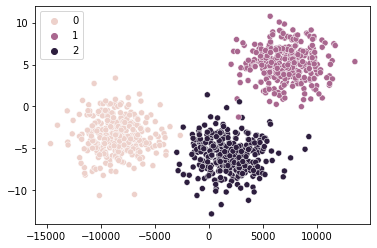

In [7]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [12]:
X_train

array([[ 9.76206868e+03,  5.40785062e+00],
       [ 2.61122147e+02, -4.97030348e+00],
       [ 2.72222550e+03, -8.32245169e+00],
       ...,
       [-2.30292664e+03, -8.10385581e+00],
       [-8.21902545e+03, -4.00392706e+00],
       [-1.00128452e+04, -5.07981747e+00]])

<AxesSubplot:>

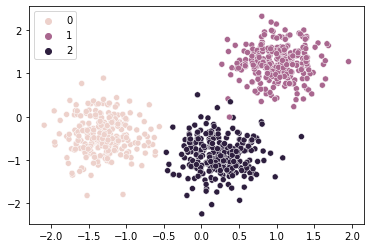

In [19]:
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train)

In [17]:
X_train.mean(axis=0)

array([-2.35922393e-17,  5.73152636e-17])

In [18]:
X_train.std(axis=0)

array([1., 1.])

In [ ]:
# (x - x.mean(axis=0)) / x.std(axis=0)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [20]:
X_test = scaler.transform(X_test)

In [60]:
from sklearn.cluster import KMeans

In [ ]:
# TSNE

In [64]:
inertias = []
for i in range(2, 11):
    clst = KMeans(i)
    clst.fit(X_train)
    inertias.append(clst.inertia_)

<AxesSubplot:>

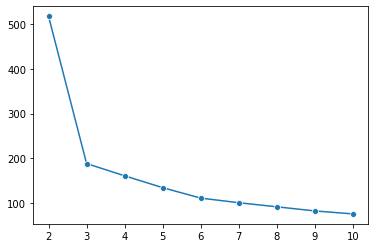

In [65]:
sns.lineplot(x=range(2, 11), y=inertias, marker='o')

In [75]:
clst = KMeans(3)
y_ = clst.fit_transform(X_train)

In [76]:
clst.__dict__

{'n_clusters': 3,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'n_init': 10,
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'algorithm': 'auto',
 'n_features_in_': 2,
 '_n_init': 10,
 '_tol': 0.0001,
 '_algorithm': 'elkan',
 '_n_threads': 16,
 'cluster_centers_': array([[ 0.2219875 , -0.88153059],
        [ 1.00459108,  1.23678731],
        [-1.30370283, -0.43237192]]),
 'labels_': array([1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 2, 1, 1, 2, 2, 0, 0, 2, 2, 0, 1, 2,
        0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 0, 0, 0, 1, 2, 1, 1, 0, 1, 0, 1,
        1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 0, 1, 0, 2, 1, 0, 1, 1, 1, 0,
        0, 1, 2, 2, 0, 2, 2, 1, 0, 1, 0, 0, 2, 1, 2, 1, 1, 0, 1, 0, 2, 1,
        1, 0, 2, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2, 0, 1, 2, 1, 0, 2, 2, 0,
        2, 0, 0, 0, 2, 1, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 1,
        0, 2, 2, 2, 2, 0, 1, 0, 1, 2, 0, 1, 2, 1, 0, 1, 2, 1, 0, 0, 2, 0,
        0, 0, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 1, 2, 0, 1, 1, 0, 0, 1, 2, 1,
   

<AxesSubplot:>

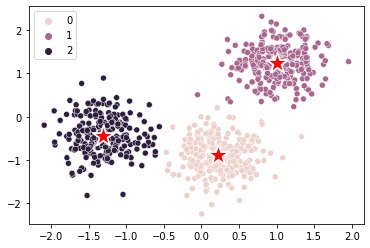

In [79]:
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=clst.labels_)

C = clst.cluster_centers_
sns.scatterplot(x=C[:, 0], y=C[:, 1], color='r', marker='*', s=500)

## Иерархический алгоритм

В иерархических методах происходит последовательное объединение наиболее близких объектов в один кластер. По сути, изначально каждый объект считается кластером, которые затем сливаются друг с другом.

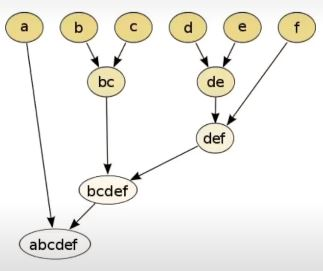

Методы определения расстояний между кластерами:
- ближнего соседа
- дальнего соседа
- групповое среднее
- расстояние между центрами
- **расстояние Уорда** (рекомендуется использовать по умолчанию)

Расстояние Уорда, упрощенно принцип выглядит так: на каждой итерации работы алгоритма для каждого варианта склейки кластера посчитать дисперсию и выбрать вариант с минимальным приростом дисперсии.

In [80]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

In [86]:
D = pdist(X_test)

In [87]:
R = hierarchy.linkage(D, 'ward')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [20.0, 20.0, 40.0, 40.0],
  [5.0, 5.0, 30.0, 30.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [62.5, 62.5, 92.5, 92.5],
  [125.0, 125.0, 135.0, 135.0],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [160.0, 160.0, 180.0, 180.0],
  [145.0, 145.0, 170.0, 170.0],
  [130.0, 130.0, 157.5, 157.5],
  [115.0, 115.0, 143.75, 143.75],
  [77.5, 77.5, 129.375, 129.375],
  [17.5, 17.5, 103.4375, 103.4375],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [202.5, 202.5, 232.5, 232.5],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [265.0, 265.0, 282.5, 282.5],
  [255.0, 255.0, 273.75, 273.75],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [264.375, 264.375, 312.5, 312.5],
  [217.5, 217.5, 288.4375, 288.4375],
  [345.0, 34

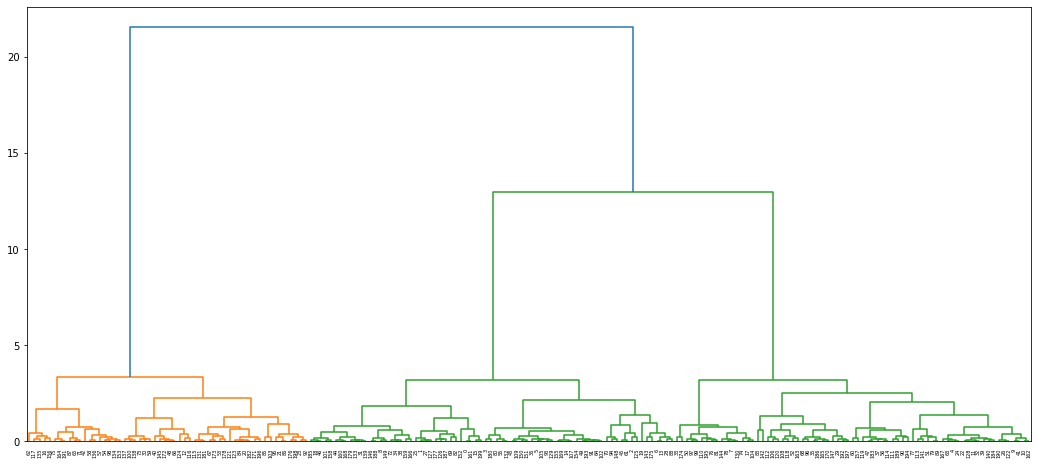

In [88]:
plt.subplots(figsize=(18, 8))
hierarchy.dendrogram(R)

In [89]:
from sklearn.cluster import AgglomerativeClustering

In [91]:
clst = AgglomerativeClustering(3)
clst.fit(X_train)

AgglomerativeClustering(n_clusters=3)

In [92]:
clst.__dict__

{'n_clusters': 3,
 'distance_threshold': None,
 'memory': None,
 'connectivity': None,
 'compute_full_tree': 'auto',
 'linkage': 'ward',
 'affinity': 'euclidean',
 'compute_distances': False,
 'n_features_in_': 2,
 'children_': array([[ 537,  619],
        [ 275,  752],
        [ 353,  436],
        ...,
        [1587, 1591],
        [1594, 1596],
        [1595, 1597]]),
 'n_connected_components_': 1,
 'n_leaves_': 800,
 'n_clusters_': 3,
 'labels_': array([1, 2, 2, 1, 0, 1, 1, 1, 2, 2, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 1, 0,
        2, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 2, 2, 1, 0, 1, 1, 2, 1, 2, 1,
        1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 2, 0, 1, 2, 1, 1, 1, 2,
        2, 1, 0, 0, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 0, 1, 1, 2, 1, 2, 0, 1,
        1, 2, 0, 0, 2, 0, 1, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 0, 2,
        0, 2, 2, 2, 0, 1, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0, 0, 1, 1, 2, 1, 1,
        2, 0, 0, 0, 0, 2, 1, 2, 1, 0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 2, 0, 2,
        2, 2, 0, 0, 1, 2, 1,

<AxesSubplot:>

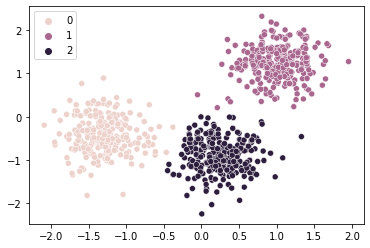

In [94]:
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=clst.labels_)